<a href="https://colab.research.google.com/github/TejasreeL/Color-Palette-Extractor-and-More/blob/main/Color_Palette_Extractor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Dependencies & Imports

In [277]:
!pip install webcolors==1.13
!pip install noise opensimplex

# Core Imports
import os, json, random, colorsys
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image, ImageDraw, ImageFilter
from IPython.display import display

# Create output directory
os.makedirs("/content/output", exist_ok=True)

print("✅ All dependencies installed and imported.")

✅ All dependencies installed and imported.


#Helper Functions

In [278]:
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

def brightness(c):
    return 0.299*c[0] + 0.587*c[1] + 0.114*c[2]

def display_image(img, title="Image", size=(6,6)):
    plt.figure(figsize=size)
    plt.imshow(img)
    plt.axis("off")
    plt.title(title)
    plt.show()

def create_color_bar(colors, title="Color Palette"):
    plt.figure(figsize=(8,2))
    for i, color in enumerate(colors):
        plt.fill_between([i, i+1], 0, 1, color=color)
    plt.axis('off')
    plt.title(title)
    plt.show()

def save_image(img, path, name):
    img.save(path)
    print(f"✅ Saved {name}: {path}")

#Extract Color Palette

Enter image path (e.g., /content/sample.jpg): /content/Screenshot 2024-12-19 204541.png


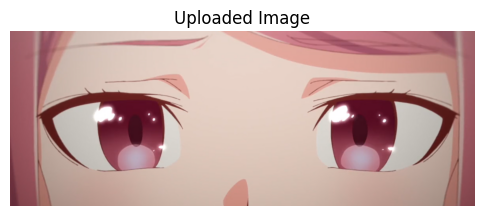


🎨 Dominant Colors (Light → Dark):
Color 1: #e1cdc3
Color 2: #ceb5ab
Color 3: #bb8f8b
Color 4: #9a5a61
Color 5: #5f1b26


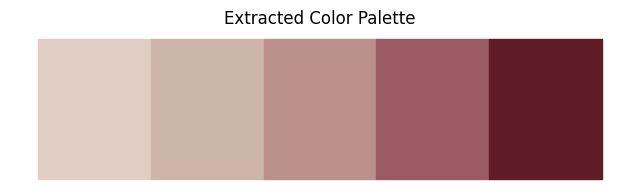


🧠 Palette Name: Soft Balanced Dream
📖 Palette Story: This palette, 'Soft Balanced Dream', evokes a calm mood with balanced tones.


In [285]:
image_path = input("Enter image path (e.g., /content/sample.jpg): ").strip()
img = Image.open(image_path).convert('RGB')
display_image(img, "Uploaded Image")

def extract_palette(image, num_colors=5):
    img_small = image.resize((150, 150))
    pixels = np.array(img_small).reshape(-1, 3)
    kmeans = KMeans(n_clusters=num_colors, random_state=42).fit(pixels)
    colors = [tuple(map(int, c)) for c in kmeans.cluster_centers_]
    return sorted(colors, key=brightness, reverse=True)

colors_sorted = extract_palette(img)
hex_colors = [rgb_to_hex(c) for c in colors_sorted]

print("\n🎨 Dominant Colors (Light → Dark):")
for i, h in enumerate(hex_colors, 1):
    print(f"Color {i}: {h}")

create_color_bar(hex_colors, "Extracted Color Palette")

def name_palette(colors):
    avg_bright = np.mean([brightness(c) for c in colors])
    avg_hue = np.mean([colorsys.rgb_to_hsv(*[x/255 for x in c])[0] for c in colors])
    tone = "Warm" if avg_hue < 0.1 or avg_hue > 0.8 else "Cool" if 0.5 < avg_hue < 0.7 else "Balanced"
    mood = "Vibrant" if avg_bright > 160 else "Muted" if avg_bright < 90 else "Soft"
    adjectives = ["Harmony", "Dream", "Pulse", "Whisper", "Glow", "Serenity"]
    return f"{mood} {tone} {random.choice(adjectives)}"

palette_name = name_palette(colors_sorted)
story = f"This palette, '{palette_name}', evokes a {random.choice(['calm','energetic','elegant','modern'])} mood with {random.choice(['balanced tones','soft contrasts','gentle gradients','crisp vibrance'])}."
print(f"\n🧠 Palette Name: {palette_name}")
print(f"📖 Palette Story: {story}")

#Extract as JSON

In [288]:
palette_data = {
    "palette_name": palette_name,
    "colors_rgb": colors_sorted,
    "colors_hex": hex_colors,
    "story": story
}

json_path = "/content/output/palette.json"
with open(json_path, "w") as f:
    json.dump(palette_data, f, indent=4)


print(f"✅ Palette exported to: {json_path}")


✅ Palette exported to: /content/output/palette.json


#Gradient Wallpaper

✅ Saved Gradient Wallpaper: /content/output/gradient_wallpaper.png


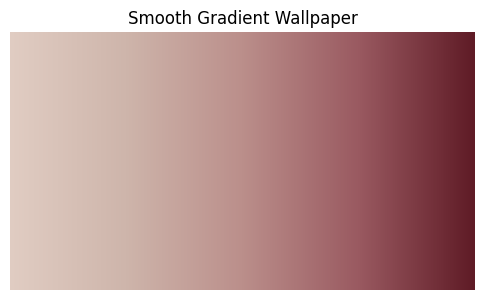

In [292]:
def generate_gradient_wallpaper(colors, width=900, height=500):
    n = len(colors)
    img = Image.new("RGB", (width, height))
    draw = ImageDraw.Draw(img)
    colors = np.array(colors, dtype=float)
    for x in range(width):
        pos = x / (width - 1) * (n - 1)
        i = int(np.floor(pos))
        j = min(i + 1, n - 1)
        t = pos - i
        color = (1 - t) * colors[i] + t * colors[j]
        draw.line([(x, 0), (x, height)], fill=tuple(map(int, color)))
    return img

gradient_img = generate_gradient_wallpaper(colors_sorted)
gradient_path = "/content/output/gradient_wallpaper.png"
save_image(gradient_img, gradient_path, "Gradient Wallpaper")
display_image(gradient_img, "Smooth Gradient Wallpaper")

#Grained Wallpaper

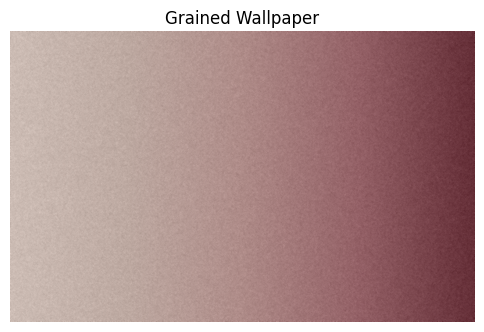

✅ Saved: /content/output/ai_wallpaper.png


In [293]:
def generate_ai_wallpaper(colors, width=800, height=500):
    base = generate_gradient_wallpaper(colors, width, height)
    noise = Image.effect_noise(base.size, 50)
    blended = Image.blend(base, noise.convert('RGB'), alpha=0.2)
    draw = ImageDraw.Draw(blended)
    final = blended.filter(ImageFilter.SMOOTH_MORE)
    return final

ai_wallpaper = generate_ai_wallpaper(colors_sorted)
ai_path = "/content/output/ai_wallpaper.png"
ai_wallpaper.save(ai_path)

display_image(ai_wallpaper, "Grained Wallpaper")
print(f"✅ Saved: {ai_path}")

#Textured Wallpaper

✅ Saved AI Textured Wallpaper: /content/output/ai_wallpaper.png


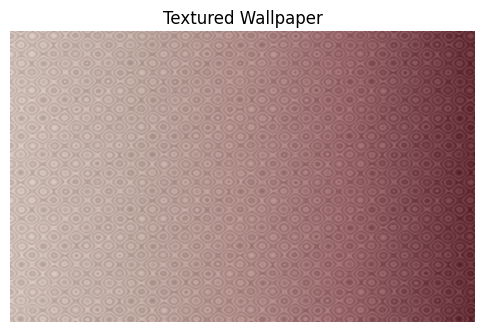

In [302]:
def plasma_texture(size):
    w, h = size
    x, y = np.mgrid[0:h, 0:w]
    scale = random.randint(4,7)
    arr = (np.sin(x/scale) + np.cos(y/random.randint(scale-1,scale+1)) + np.sin((x+y)/random.randint(10,40)))*random.randint(200,237) + 128
    return Image.fromarray(arr.astype(np.uint8))

def generate_ai_wallpaper(colors, width=800, height=500):
    base = generate_gradient_wallpaper(colors, width, height)
    noise = plasma_texture(base.size)
    blended = Image.blend(base, noise.convert('RGB'), alpha=0.2)
    return blended.filter(ImageFilter.SMOOTH_MORE)

ai_wallpaper = generate_ai_wallpaper(colors_sorted)
ai_path = "/content/output/ai_wallpaper.png"
save_image(ai_wallpaper, ai_path, "AI Textured Wallpaper")
display_image(ai_wallpaper, "Textured Wallpaper")

#Color Harmony Schemes


🎨 Complementary Scheme: Contrast and highlight colors.


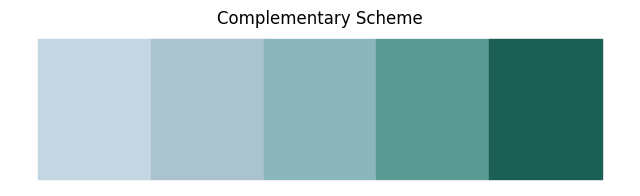


🎨 Analogous Scheme: Smooth transitions for cohesive designs.


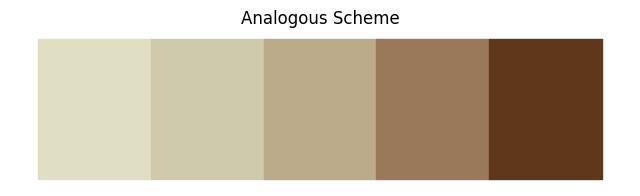


🎨 Triadic Scheme: Balanced variety for visual harmony.


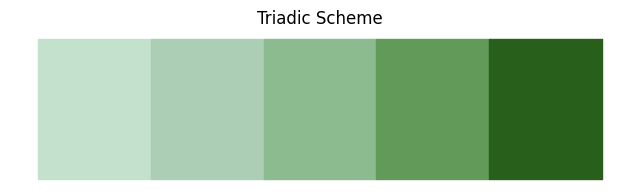

In [304]:
def generate_color_harmonies(colors):
    shifts = {"Complementary": 0.5, "Analogous": 0.1, "Triadic": 0.33}
    harmonies = {}
    for name, shift in shifts.items():
        shifted = []
        for c in colors:
            r,g,b = [x/255 for x in c]
            h,s,v = colorsys.rgb_to_hsv(r,g,b)
            h = (h + shift) % 1.0
            r2,g2,b2 = [int(x*255) for x in colorsys.hsv_to_rgb(h,s,v)]
            shifted.append((r2,g2,b2))
        harmonies[name] = shifted
    return harmonies

explanations = {
    "Complementary": "Contrast and highlight colors.",
    "Analogous": "Smooth transitions for cohesive designs.",
    "Triadic": "Balanced variety for visual harmony."
}

for name, cols in generate_color_harmonies(colors_sorted).items():
    print(f"\n🎨 {name} Scheme: {explanations[name]}")
    create_color_bar([rgb_to_hex(c) for c in cols], f"{name} Scheme")

#Mood Board

✅ Saved Mood Board: /content/output/moodboard.png


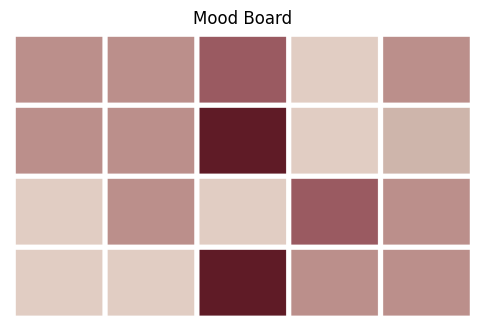

In [306]:
def generate_mood_board(colors, width=800, height=500, cols=5, rows=4, padding=10):
    img = Image.new("RGB", (width, height), (255, 255, 255))
    draw = ImageDraw.Draw(img)
    rect_w = (width - padding*(cols+1)) // cols
    rect_h = (height - padding*(rows+1)) // rows
    for r in range(rows):
        for c in range(cols):
            x1 = padding + c*(rect_w + padding)
            y1 = padding + r*(rect_h + padding)
            draw.rectangle([x1, y1, x1+rect_w, y1+rect_h], fill=random.choice(colors))
    return img

moodboard = generate_mood_board(colors_sorted)
moodboard_path = "/content/output/moodboard.png"
save_image(moodboard, moodboard_path, "Mood Board")
display_image(moodboard, "Mood Board")

#Palette Cards

✅ Saved Palette Card 1: /content/output/palette_card_1.png


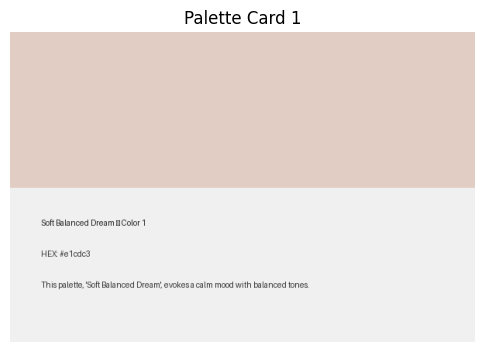

✅ Saved Palette Card 2: /content/output/palette_card_2.png


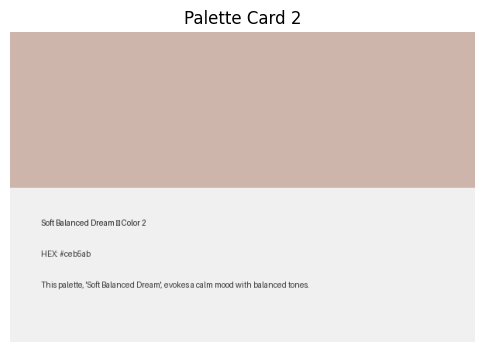

✅ Saved Palette Card 3: /content/output/palette_card_3.png


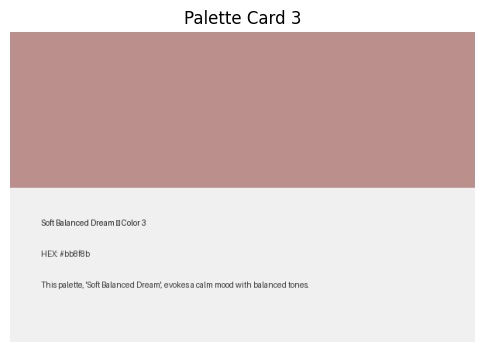

✅ Saved Palette Card 4: /content/output/palette_card_4.png


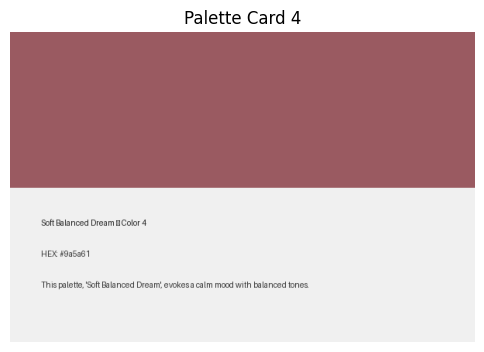

✅ Saved Palette Card 5: /content/output/palette_card_5.png


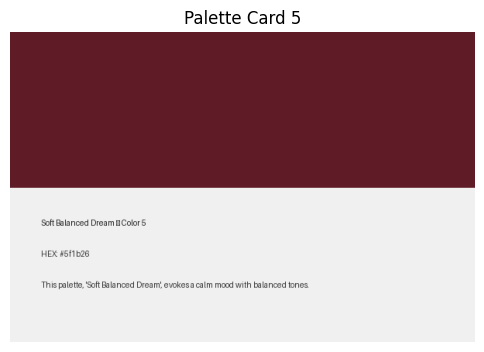

In [307]:
def generate_single_color_card(color, name, story, idx, width=600, height=400):
    img = Image.new("RGB", (width, height), (240, 240, 240))
    draw = ImageDraw.Draw(img)
    draw.rectangle([0, 0, width, height//2], fill=color)
    draw.text((40, height//2 + 40), f"{name} — Color {idx+1}", fill=(30,30,30))
    draw.text((40, height//2 + 80), f"HEX: {rgb_to_hex(color)}", fill=(50,50,50))
    draw.text((40, height//2 + 120), story, fill=(50,50,50))
    return img

for i, color in enumerate(colors_sorted):
    card = generate_single_color_card(color, palette_name, story, i)
    card_path = f"/content/output/palette_card_{i+1}.png"
    save_image(card, card_path, f"Palette Card {i+1}")
    display_image(card, f"Palette Card {i+1}")

#Palette Filter to Another Image

Enter path to another image for palette filter: /content/Screenshot 2025-10-27 141651.png


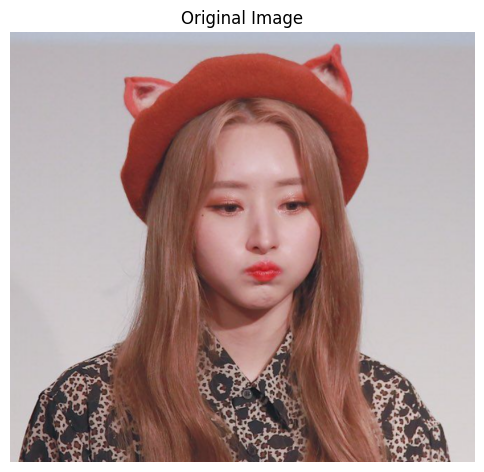

✅ Saved Palette Filtered Image: /content/output/palette_filter.png


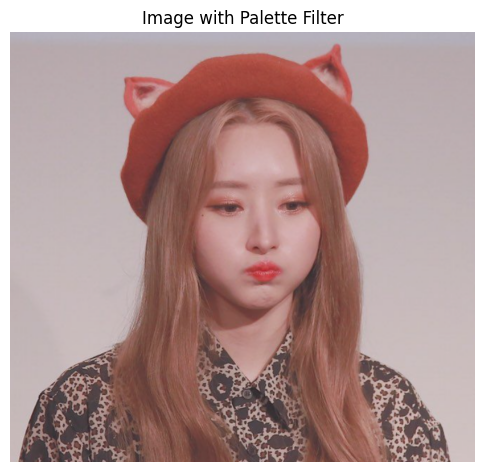

In [311]:
def apply_palette_filter_vibrant(image, palette):
    img_arr = np.array(image).astype(float) / 255.0
    avg_color = np.mean(palette, axis=0) / 255.0
    tinted = img_arr * 0.8 + avg_color * 0.2
    tinted = np.clip(tinted, 0, 1)
    return Image.fromarray((tinted * 255).astype(np.uint8))

filter_path = input("Enter path to another image for palette filter: ").strip()
img2 = Image.open(filter_path).convert('RGB')
display_image(img2, "Original Image")

filtered = apply_palette_filter_vibrant(img2, colors_sorted)
filtered_path = "/content/output/palette_filter.png"
save_image(filtered, filtered_path, "Palette Filtered Image")
display_image(filtered, "Image with Palette Filter")